<a href="https://colab.research.google.com/github/YounkoA/Python-Nootbook/blob/main/canny_hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hough transform
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04b_hough_transform/hough_transform.ipynb)



In [ ]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YounkoA/Hough-transform/blob/main/skyscrapers.jpg".split()
    )


In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

figsize = (10, 10)



In [ ]:
from google.colab import files
upload = files.upload()

Saving skyscrapers.jpg to skyscrapers.jpg


## Import an image


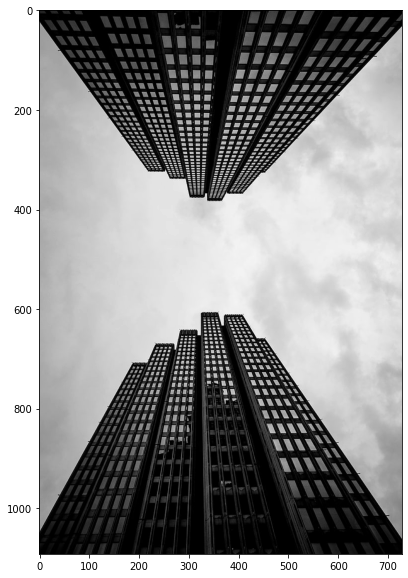

In [ ]:
im3 = cv2.imread("skyscrapers.jpg")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()



## Find edges of an image using Canny
For more details about Canny edge detection, look at lecture 3


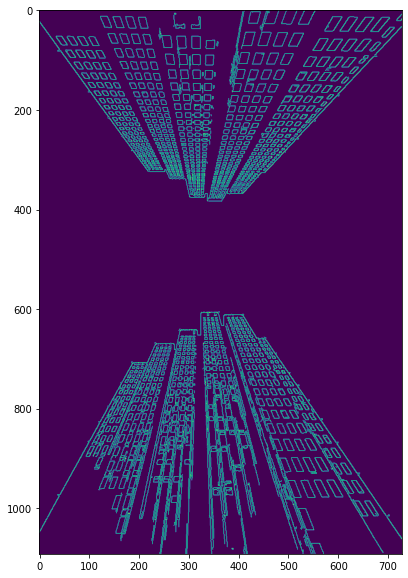

In [ ]:
mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()



## Initialize accumulation matrix


In [ ]:
# choose R size
r_step = 1
rmax = np.sqrt(im.shape[0] ** 2 + im.shape[1] ** 2)
r_vec = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi / 180
t_vec = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r_vec.shape[0], t_vec.shape[0]))



## Fill accumulation matrix


In [ ]:
# get indices of edges
edge_inds = np.argwhere(mag_im > 0)

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t_vec):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x * np.cos(t0) + y * np.sin(t0)
        r_ind = np.argmin(np.abs(r0 - r_vec))

        acc_mat[r_ind, t_ind] += 1



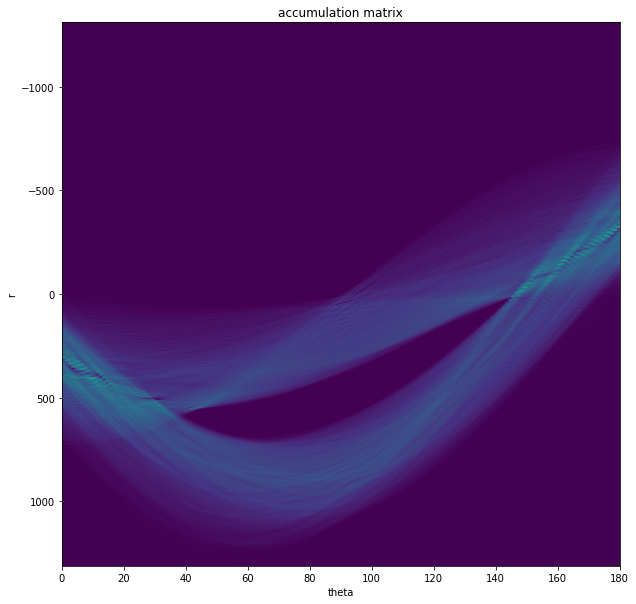

In [ ]:
plt.figure(figsize=figsize)
plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix")
plt.show()



## Threshold accumulation matrix


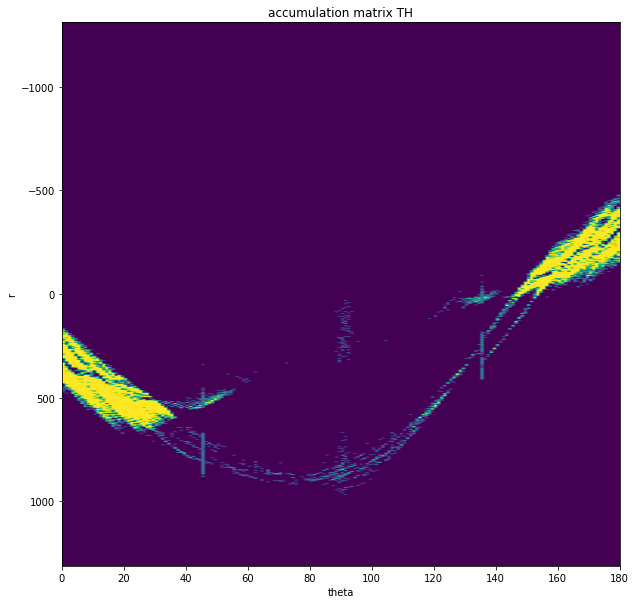

In [ ]:
TH = 100
acc_mat_th = acc_mat > TH

plt.figure(figsize=figsize)
plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix TH")
plt.show()



## Plot lines found by hough


Output streaming akan dipotong hingga 5000 baris terakhir.
(rho,theta): (448.5793357311079, 2.0)
(rho,theta): (448.5793357311079, 3.0)
(rho,theta): (448.5793357311079, 4.0)
(rho,theta): (448.5793357311079, 5.0)
(rho,theta): (448.5793357311079, 6.0)
(rho,theta): (448.5793357311079, 7.0)
(rho,theta): (448.5793357311079, 8.0)
(rho,theta): (448.5793357311079, 9.0)
(rho,theta): (448.5793357311079, 10.0)
(rho,theta): (448.5793357311079, 11.0)
(rho,theta): (448.5793357311079, 12.0)
(rho,theta): (448.5793357311079, 13.000000000000002)
(rho,theta): (448.5793357311079, 14.0)
(rho,theta): (448.5793357311079, 15.0)
(rho,theta): (448.5793357311079, 16.0)
(rho,theta): (448.5793357311079, 17.000000000000004)
(rho,theta): (448.5793357311079, 18.0)
(rho,theta): (448.5793357311079, 19.000000000000004)
(rho,theta): (448.5793357311079, 20.0)
(rho,theta): (448.5793357311079, 21.0)
(rho,theta): (448.5793357311079, 22.0)
(rho,theta): (449.5793357311079, 0.0)
(rho,theta): (449.5793357311079, 2.0)
(rho,theta):

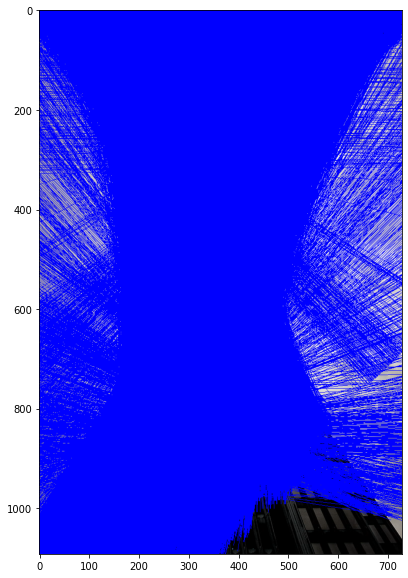

In [ ]:
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = im3.copy()
for r_ind, t_ind in edge_inds:
    rho = r_vec[r_ind]
    theta = t_vec[t_ind]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Try cv2.HoughLines
This implementation is faster since it was done in C


(rho,theta): (-75.0, 152.99999401232913)
(rho,theta): (13.0, 144.00000400716507)
(rho,theta): (-8.0, 145.99999267917153)
(rho,theta): (-145.0, 159.99999534548672)
(rho,theta): (-278.0, 174.99999234780518)
(rho,theta): (-173.0, 162.99999201387476)
(rho,theta): (430.0, 15.000000417413029)
(rho,theta): (455.0, 18.999999959540737)
(rho,theta): (-114.0, 156.99999867709872)
(rho,theta): (553.0, 42.99999891985429)
(rho,theta): (-161.0, 161.99999767787153)
(rho,theta): (-31.0, 149.0000030079379)
(rho,theta): (-293.0, 176.99999468018999)
(rho,theta): (-122.0, 157.99999301310194)
(rho,theta): (-270.0, 173.99999801180195)
(rho,theta): (508.0, 28.999999668633656)
(rho,theta): (-66.0, 151.9999996763259)
(rho,theta): (413.0, 12.000000333930423)
(rho,theta): (476.0, 22.999999501668448)
(rho,theta): (-34.0, 149.0000030079379)
(rho,theta): (-17.0, 147.00000067555308)
(rho,theta): (-310.0, 178.00000267657154)
(rho,theta): (-306.0, 178.00000267657154)
(rho,theta): (334.0, 1.9999999845072665)
(rho,theta):

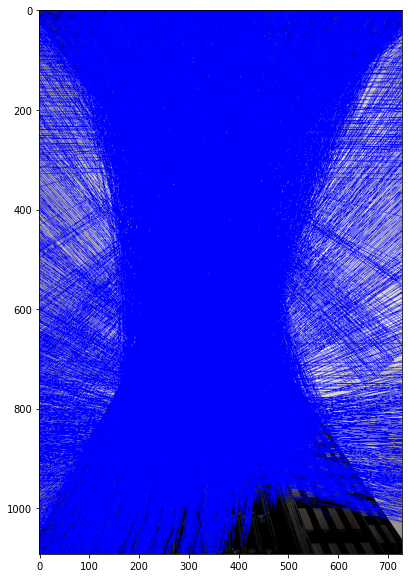

In [ ]:
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Complete new example of a more complex image
We can see on the bottom horizontal lines that the "noise" of the tree top edges is interfeering with the line detection.


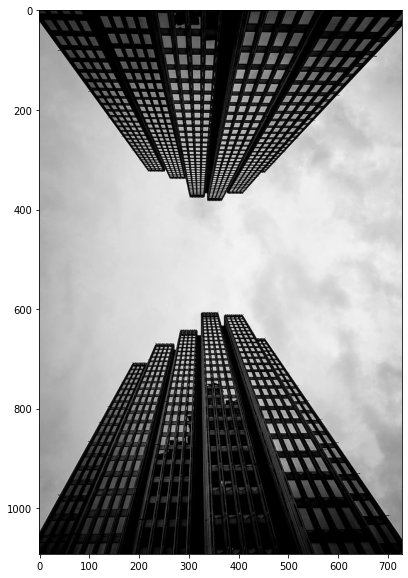

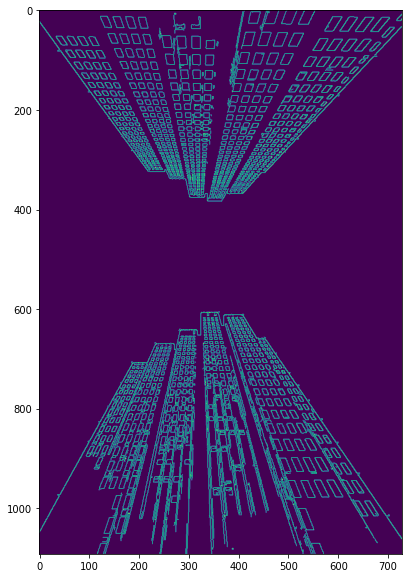

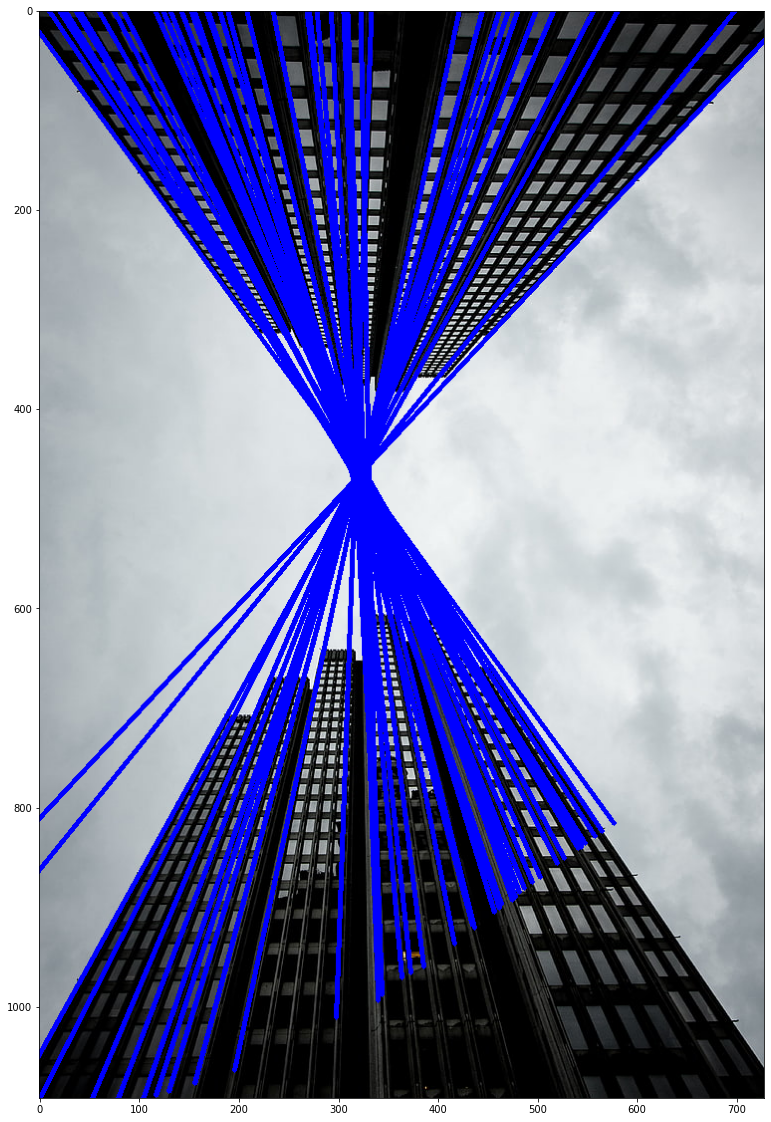

In [ ]:
im3 = cv2.imread("skyscrapers.jpg")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()

mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()

TH = 247
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()

